In [ ]:
# importing the dataset
import pandas
import numpy
from sklearn import preprocessing

df = pandas.read_csv('/content/adult.csv')
df.head(10)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.shape

(32561, 15)

In [ ]:
df = df.drop(['fnlwgt', 'educational-num'], axis=1)

col_names = df.columns

for c in col_names:
	df = df.replace("?", numpy.NaN)
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [ ]:
df.columns


Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
df.replace(['Divorced', 'Married-AF-spouse',
			'Married-civ-spouse', 'Married-spouse-absent',
			'Never-married', 'Separated', 'Widowed'],
		['divorced', 'married', 'married', 'married',
			'not married', 'not married', 'not married'], inplace=True)

category_col = ['workclass', 'race', 'education', 'marital-status', 'occupation',
				'relationship', 'gender', 'native-country', 'income']
labelEncoder = preprocessing.LabelEncoder()

mapping_dict = {}
for col in category_col:
	df[col] = labelEncoder.fit_transform(df[col])

	le_name_mapping = dict(zip(labelEncoder.classes_,
							labelEncoder.transform(labelEncoder.classes_)))

	mapping_dict[col] = le_name_mapping
print(mapping_dict)


{'workclass': {' ?': 0, ' Federal-gov': 1, ' Local-gov': 2, ' Never-worked': 3, ' Private': 4, ' Self-emp-inc': 5, ' Self-emp-not-inc': 6, ' State-gov': 7, ' Without-pay': 8}, 'race': {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}, 'education': {' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}, 'marital-status': {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}, 'occupation': {' ?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5, ' Handlers-cleaners': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Priv-house-serv': 9, ' Prof-specialty': 10, ' Protective-serv': 11, ' Sales': 12, '

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.values[:, 0:12]
Y = df.values[:, 12]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
		X, Y, test_size = 0.3, random_state = 100)

dt_clf_gini = DecisionTreeClassifier(criterion = "gini",
									random_state = 100,
									max_depth = 5,
									min_samples_leaf = 5)

dt_clf_gini.fit(X_train, y_train)
y_pred_gini = dt_clf_gini.predict(X_test)

print ("Decision Tree using Gini Index\nAccuracy is ",
			accuracy_score(y_test, y_pred_gini)*100 )



Decision Tree using Gini Index
Accuracy is  83.13031016480704


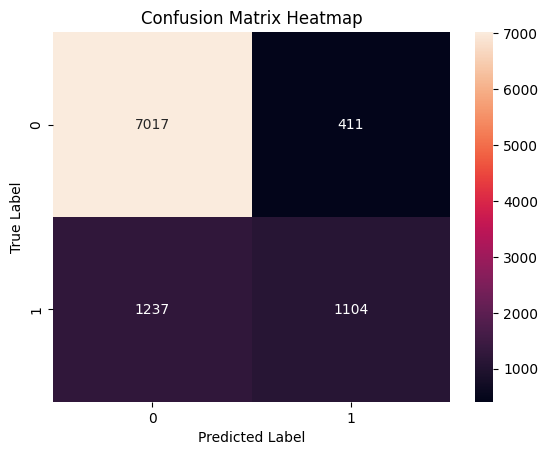

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification

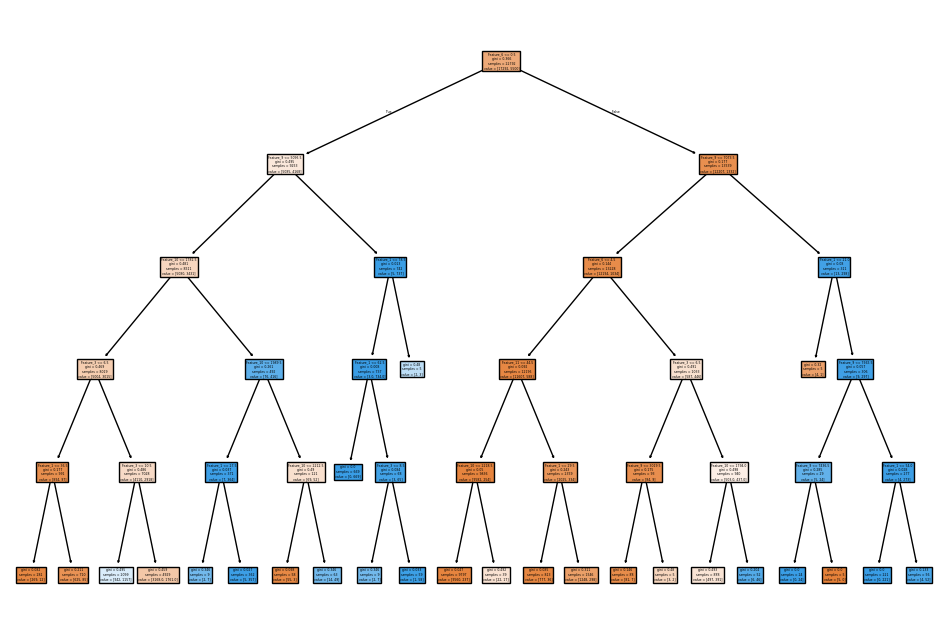

In [ ]:
plt.figure(figsize=(12, 8))

# Create a list of feature names matching the actual number of features in your dataset
feature_names = [f'Feature_{i+1}' for i in range(12)]  # Create 12 feature names

plot_tree(dt_clf_gini, feature_names=feature_names, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

print("Precision:", precision_score(y_test, y_pred_gini))
print("Recall:", recall_score(y_test, y_pred_gini))
print("F1-Score:", f1_score(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))

Precision: 0.7287128712871287
Recall: 0.4715933361811192
F1-Score: 0.5726141078838174
Confusion Matrix:
 [[7017  411]
 [1237 1104]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.values[:, 0:12]
Y = df.values[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Logistic Regression\nAccuracy is ", accuracy_score(y_test,y_pred)*100)


Logistic Regression
Accuracy is  80.37670181185382


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


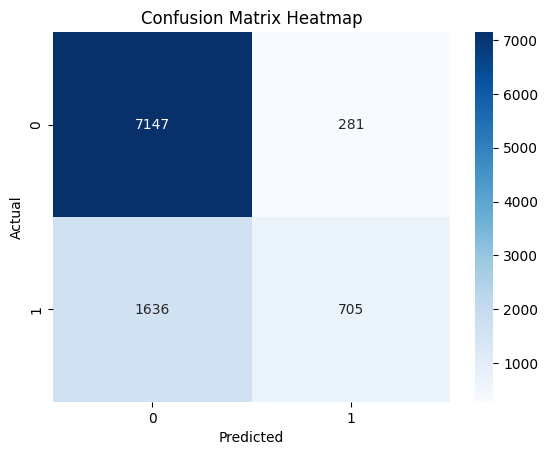

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.values[:, 0:12]
Y = df.values[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("SVM\nAccuracy is ", accuracy_score(y_test, y_pred)*100)



SVM
Accuracy is  80.69403214249155


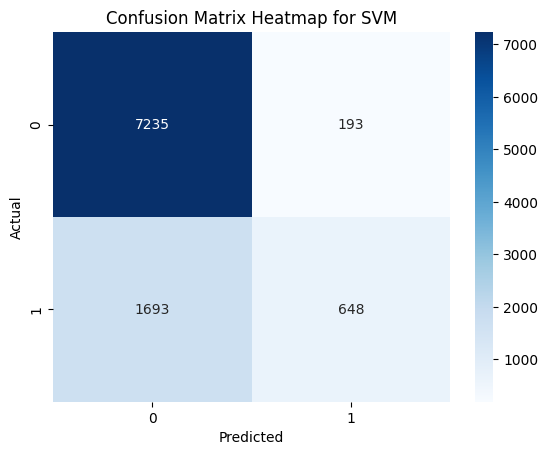

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for SVM')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.values[:, 0:12]
Y = df.values[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Naive Bayes\nAccuracy is ", accuracy_score(y_test, y_pred)*100)

Naive Bayes
Accuracy is  80.3664653495752


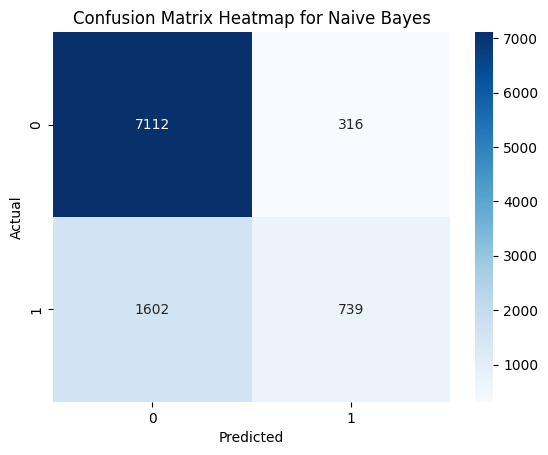

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Naive Bayes')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_clf_gini, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
		X, Y, test_size = 0.3, random_state = 100)

dt_clf_gini = DecisionTreeClassifier(criterion = "gini",
									random_state = 100,
									max_depth = 5,
									min_samples_leaf = 5)

dt_clf_gini.fit(X_train, y_train)
y_pred_gini = dt_clf_gini.predict(X_test)

print ("Decision Tree using Gini Index\nAccuracy is ",
			accuracy_score(y_test, y_pred_gini)*100 )

Decision Tree using Gini Index
Accuracy is  83.13031016480704


In [ ]:
def gradient_descent(f, df, x0, learning_rate, max_iter):
  x = x0
  for i in range(max_iter):
    x = x - learning_rate * df(x)
  return x

In [ ]:
def gradient_descent(f, df, x0, learning_rate, max_iter):
  x = x0
  for i in range(max_iter):
    x = x - learning_rate * df(x)
  return x

# Example usage
def f(x):
  return x**2

def df(x):
  return 2*x

x0 = 2
learning_rate = 0.1
max_iter = 100

x_min = gradient_descent(f, df, x0, learning_rate, max_iter)

print("Minimum found:", x_min)
print("Value of function at minimum:", f(x_min))
true_minimum = 0
error = abs(x_min - true_minimum)
print("Error:", error)

# Check the norm of the gradient at the found minimum
gradient_at_minimum = df(x_min)
print("Norm of gradient at minimum:", abs(gradient_at_minimum))

Minimum found: 4.0740719526689754e-10
Value of function at minimum: 1.6598062275523998e-19
Error: 4.0740719526689754e-10
Norm of gradient at minimum: 8.148143905337951e-10


In [ ]:
def gradient_descent(f, df, x0, learning_rate, max_iter, tol):
  x = x0
  for i in range(max_iter):
    gradient = df(x)
    x = x - learning_rate * gradient
    if abs(gradient) < tol:
      print("Converged after", i+1, "iterations.")
      return x
  print("Did not converge within", max_iter, "iterations.")
  return x

# Example usage (same as before)
def f(x):
  return x**2

def df(x):
  return 2*x

x0 = 2
learning_rate = 0.1
max_iter = 100
tol = 1e-6  # Tolerance for convergence

x_min = gradient_descent(f, df, x0, learning_rate, max_iter, tol)

print("Minimum found:", x_min)
print("Value of function at minimum:", f(x_min))

Converged after 70 iterations.
Minimum found: 3.2910091146424137e-07
Value of function at minimum: 1.0830740992659443e-13


In [ ]:
# Example 1: A more complex function with local minima
def f(x):
    return x**4 - 3*x**3 + 2

def df(x):
    return 4*x**3 - 9*x**2


In [ ]:
def f(x, y):
    return x**2 + y**2

def df(x, y):
    return (2*x, 2*y)


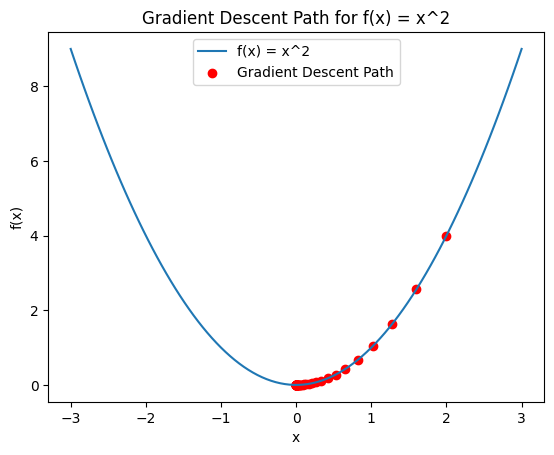

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
  return x**2

# Define the derivative df(x)
def df(x):
  return 2*x

# Plot the function
x_values = np.linspace(-3, 3, 100)
y_values = f(x_values)  # Use the correct f(x)

plt.plot(x_values, y_values, label='f(x) = x^2')

# Plot the points visited by gradient descent
x = x0
points = [x]
for i in range(max_iter):
    gradient = df(x)
    x = x - learning_rate * gradient
    points.append(x)
    if abs(gradient) < tol:
        break

points = np.array(points)
plt.scatter(points, f(points), color='red', label='Gradient Descent Path') # Use the correct f(x)
plt.title('Gradient Descent Path for f(x) = x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [ ]:
!pip install scikit-learn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_regression(n_samples=100, n_features=4, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)



In [ ]:
#Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error # Import the mean_squared_error function
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2225.927866277433


In [ ]:
# Calculate the coefficient of determination (R^2)
r2 = model.score(X_test, y_test)
print("R-squared:", r2)

R-squared: 0.8960679927390596


In [ ]:
!pip install scikit-learn==1.3.0

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification # Import make_classification to generate sample data

# Generate sample data for classification
X, Y = make_classification(n_samples=1000, n_features=4, random_state=0)

# Assuming X and Y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[141   4]
 [  6 149]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report # Import classification_report
import seaborn as sns # Import seaborn for heatmap

In [ ]:
X, Y = make_classification(n_samples=1000, n_features=4, random_state=0)
# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred)) # Use y_pred instead of y_pred_gini

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       145
           1       0.97      0.96      0.97       155

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



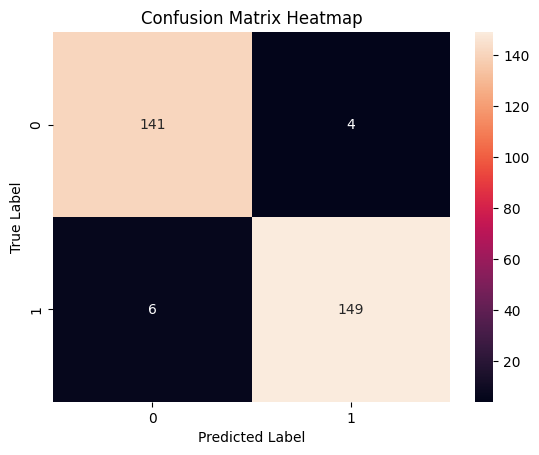

In [ ]:
# Create a heatmap of the confusion matrix
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

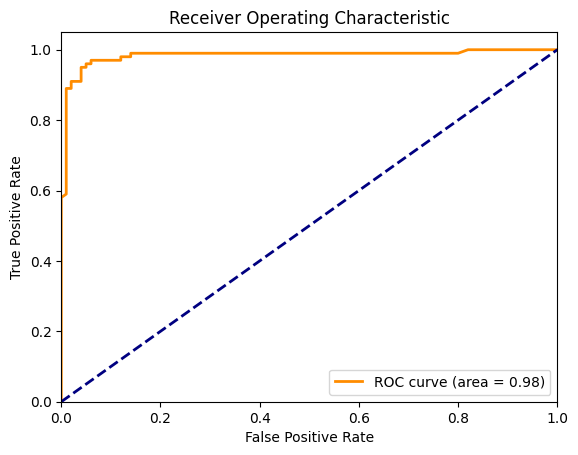

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Sample data (replace with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=4, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0) # Initialize the model
gbc.fit(X_train, y_train) # Train the model

# Assuming you want to focus on class 1
y_scores = gbc.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

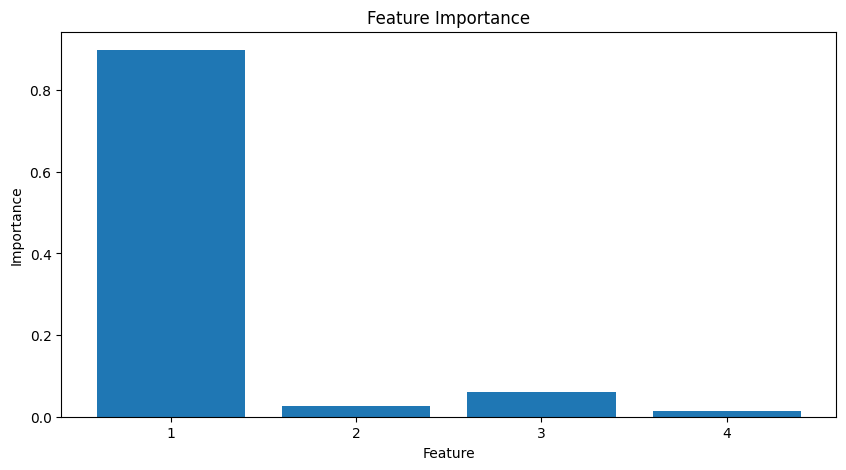

In [ ]:
feature_importances = gbc.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), range(1, len(feature_importances) + 1))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

SHAP (Shapley Additive Explanations): Understand the contribution of each feature to the model's predictions. This method assigns each feature a “Shapley value” to explain its effect on the output.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.0 MB/s eta 0:00:00


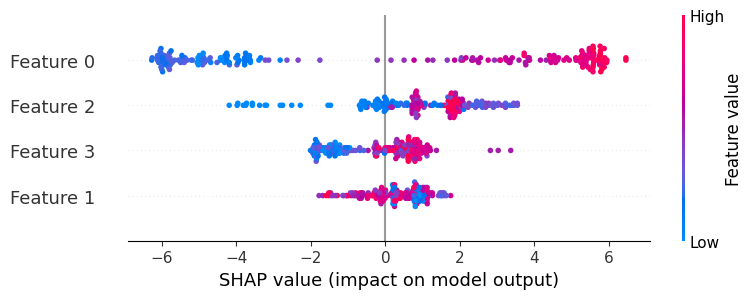

Feature 0: feature - Importance: 4.6233
Feature 1: feature - Importance: 0.7042
Feature 2: feature - Importance: 1.5537
Feature 3: feature - Importance: 0.9566

Top 5 important features:
Feature 0: feature - Importance: 4.6233
Feature 2: feature - Importance: 1.5537
Feature 3: feature - Importance: 0.9566
Feature 1: feature - Importance: 0.7042


In [ ]:
!pip install shap
import shap
import xgboost
import numpy as np

# Assuming 'X_train', 'y_train', 'X_test' are your data splits

# Train an XGBoost model (replace with your model if needed)
model = xgboost.XGBClassifier().fit(X_train, y_train)

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize the explanations
shap.summary_plot(shap_values, X_test)

# Get feature importances
feature_importances = np.mean(np.abs(shap_values), axis=0)

# Print feature importances with explanations
# Use a generic name like 'feature' if the original DataFrame is not available
for i in range(len(feature_importances)):
    print(f"Feature {i}: feature - Importance: {feature_importances[i]:.4f}")

# Optionally, print top N important features
top_n = 5
top_features_indices = np.argsort(feature_importances)[::-1][:top_n]
print("\nTop", top_n, "important features:")
# Use a generic name like 'feature' if the original DataFrame is not available
for i in top_features_indices:
    print(f"Feature {i}: feature - Importance: {feature_importances[i]:.4f}")

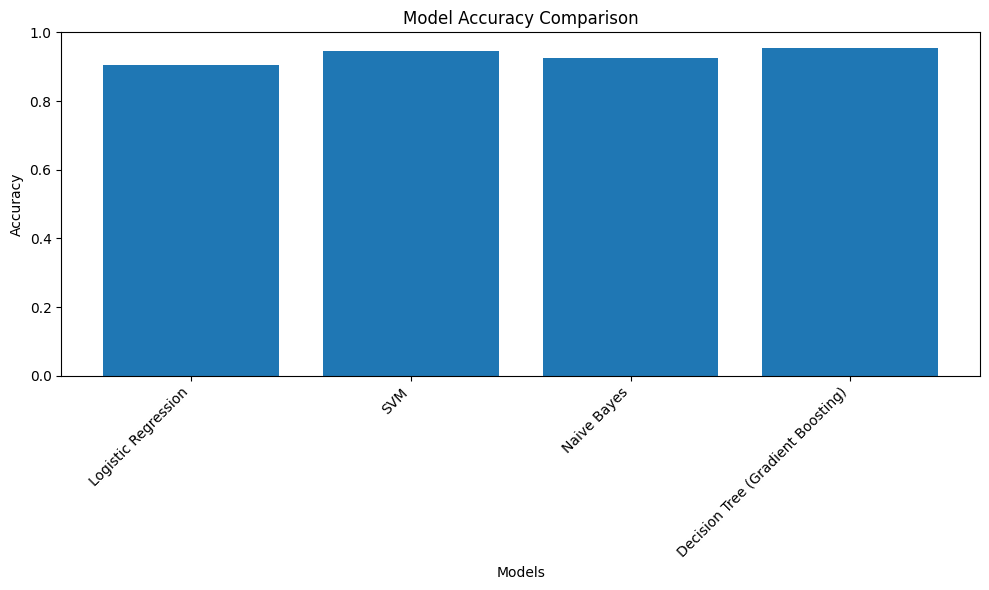

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Models
nb = GaussianNB()
svm = SVC()
logreg = LogisticRegression(max_iter=1000)
# Using GradientBoostingClassifier for Decision Tree with gradient descent
dt = GradientBoostingClassifier()

# Train and evaluate models
models = [nb, svm, logreg, dt]
model_names = ["Logistic Regression", "SVM", "Naive Bayes", "Decision Tree (Gradient Boosting)"]
accuracies = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

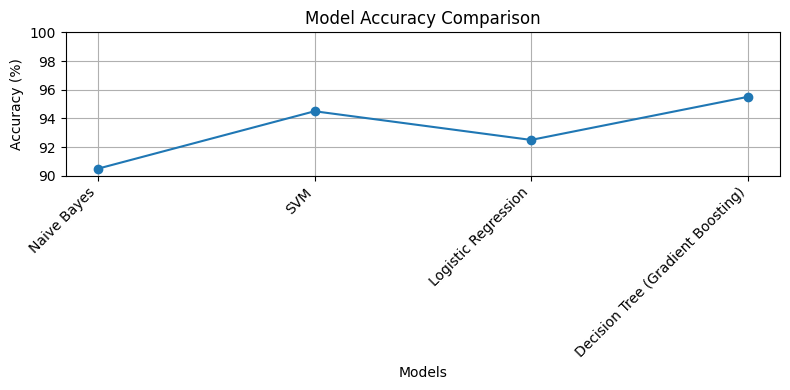

In [ ]:
# Models
nb = GaussianNB()
svm = SVC()
logreg = LogisticRegression(max_iter=1000)
dt = GradientBoostingClassifier()

# Train and evaluate models
models = [nb, svm, logreg, dt]
model_names = ["Naive Bayes", "SVM", "Logistic Regression", "Decision Tree (Gradient Boosting)"]
accuracies = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies.append(accuracy)

# Create line graph
plt.figure(figsize=(8, 4))
plt.plot(model_names, accuracies, marker='o')
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(90, 100)
plt.xticks(rotation=45, ha='right')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()
plt.show()

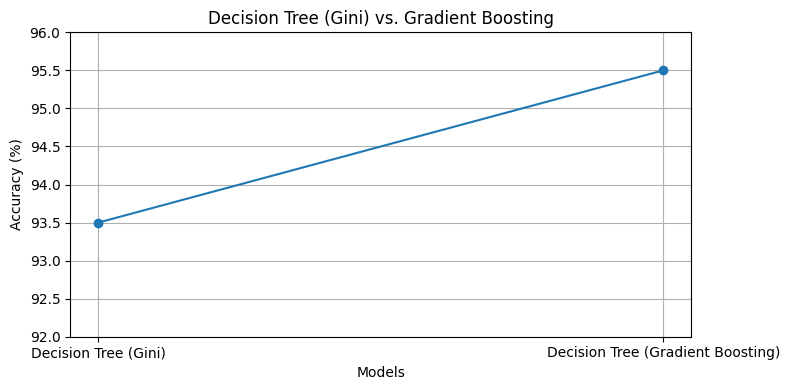

In [ ]:
# Models
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gradient_boosting = GradientBoostingClassifier()

# Train and evaluate models
models = [dt_gini, dt_gradient_boosting]
model_names = ["Decision Tree (Gini)", "Decision Tree (Gradient Boosting)"]
accuracies = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies.append(accuracy)

# Create line graph for comparison
plt.figure(figsize=(8,4))
plt.plot(model_names, accuracies, marker='o')
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Decision Tree (Gini) vs. Gradient Boosting")
plt.ylim(92, 96)
plt.grid(True)
plt.tight_layout()
plt.show()